We import the basic data analytic tools to help read the data, Clean the data and prepare it for our model

and shows the number of coloumns in the dataset

In [ ]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.utils import resample
import pylab
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# for ANN   

from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

df = pd.read_csv("Churn_Modelling.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


next we print a statistical description of the model to have a numerical overview

In [317]:
df.describe()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


shows the first 5 values in the dataset

In [318]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Next we Dropped coloumns we saw were irrelevant to the model

In [319]:
df.drop(columns={'CustomerId','RowNumber'}, inplace=True)

Now that we've droped the irrelevant coloumns we can start trainning our model by checking for outlires and missing values

first lets confirm if the coloumns has been dropped 

In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10000 non-null  object 
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


Now we check for missing values

In [321]:
df.isna()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False


No missing values in the data set next we check for outliers 

now lets visualise the data 

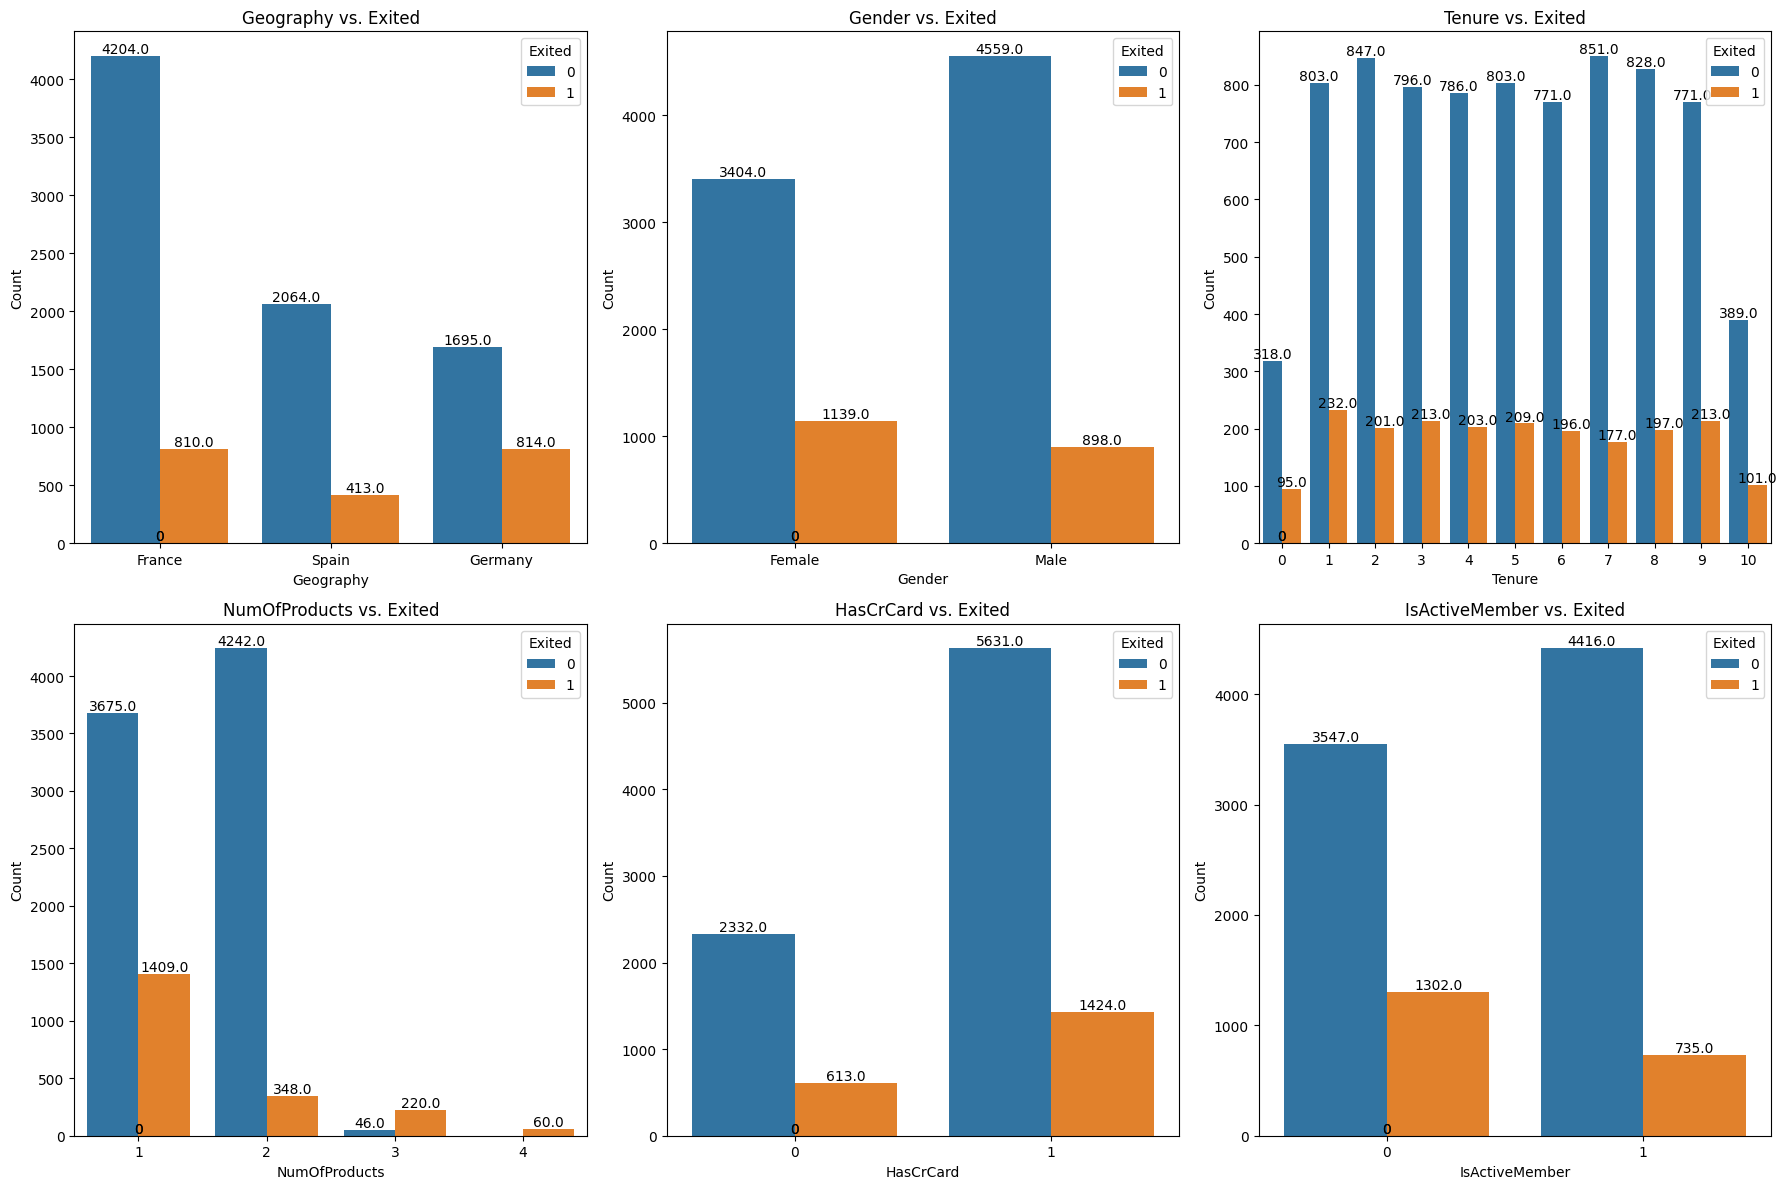

In [322]:
import matplotlib.pyplot as plt
features = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

for ax, feature in zip(axs.flatten(), features):
    sb.countplot(x=feature, hue='Exited', data=df, ax=ax)
    ax.set_title(f'{feature} vs. Exited')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')

    # Add values on the bars
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()
plt.show()

then we check for outliers using  the scatterplot visualization in seaborn

<Axes: xlabel='Age', ylabel='CreditScore'>

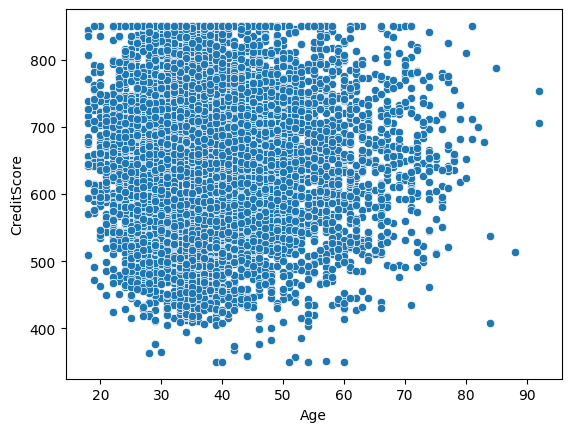

In [323]:
sb.scatterplot(x='Age', y='CreditScore', data = df)

outliers are present in the dataset 

<Axes: ylabel='CreditScore'>

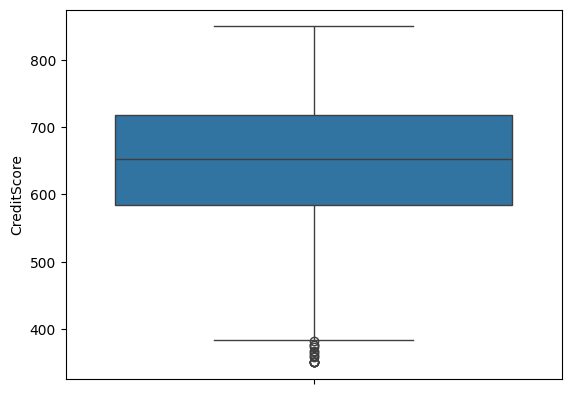

In [324]:
sb.boxplot(df['CreditScore'])

Here we can see the outliers clearly


Next we use what we call Z-score method to solve eliminate the outliers and make the data consistent

In [325]:
upper_limit = df['CreditScore'].mean() + 3*df['CreditScore'].std()
lower_limit = df['CreditScore'].mean() - 3*df['CreditScore'].std()
print(upper_limit)
print(lower_limit)

940.488696208391
360.568903791609


Now lets see our outlires


In [326]:
outliers = df.loc[(df['CreditScore']>upper_limit)|(df['CreditScore']<lower_limit)]
outliers

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1405,Panicucci,359,France,Female,44,6,128747.69,1,1,0,146955.71,1
1631,Azubuike,350,Spain,Male,54,1,152677.48,1,1,1,191973.49,1
1838,Campbell,350,Germany,Male,39,0,109733.20,2,0,0,123602.11,1
1962,Aikenhead,358,Spain,Female,52,8,143542.36,3,1,0,141959.11,1
2473,Chou,351,Germany,Female,57,4,163146.46,1,1,0,169621.69,1
8723,Onyekachi,350,France,Male,51,10,0.00,1,1,1,125823.79,1
8762,Lin,350,France,Female,60,3,0.00,1,0,0,113796.15,1
9624,Maslow,350,France,Female,40,0,111098.85,1,1,1,172321.21,1


Now we've seen them we can either delete them (Data Trimming) from the data set or we can substitute them for the repective upper or lower values(Capping), what I mean by this is those data points that are above the upper limit we'll replace them with the upper limit,While Those value that are below the lower limit we'll replace them with the lower limit

In [327]:
new_data = df.loc[(df['CreditScore']<upper_limit)&(df['CreditScore']>lower_limit)]
old_data_size = len(df)
new_data_size = len(new_data)

print('Original dataset that includes outliers: ',old_data_size)
print('dataset without the outlires: ',new_data_size)
print('outliers are:',len(outliers),'in Number')
outliers

Original dataset that includes outliers:  10000
dataset without the outlires:  9992
outliers are: 8 in Number


,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1405,Panicucci,359,France,Female,44,6,128747.69,1,1,0,146955.71,1
1631,Azubuike,350,Spain,Male,54,1,152677.48,1,1,1,191973.49,1
1838,Campbell,350,Germany,Male,39,0,109733.20,2,0,0,123602.11,1
1962,Aikenhead,358,Spain,Female,52,8,143542.36,3,1,0,141959.11,1
2473,Chou,351,Germany,Female,57,4,163146.46,1,1,0,169621.69,1
8723,Onyekachi,350,France,Male,51,10,0.00,1,1,1,125823.79,1
8762,Lin,350,France,Female,60,3,0.00,1,0,0,113796.15,1
9624,Maslow,350,France,Female,40,0,111098.85,1,1,1,172321.21,1


We ran a code to locate all the data that are not outliers, new_data = df.loc[(df['CreditScore']<upper_limit)&(df['CreditScore']>lower_limit)]
that is why the length of the new data is smaller compared to the original data


<Axes: ylabel='CreditScore'>

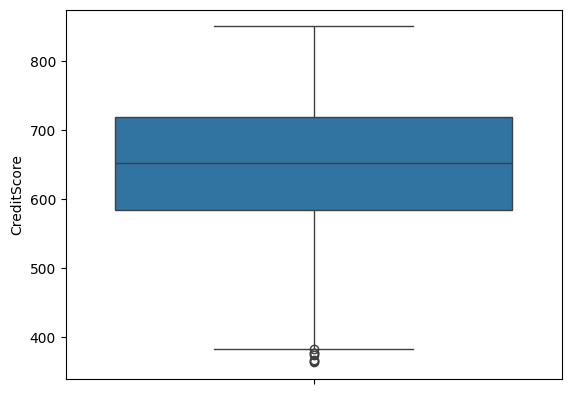

In [328]:
sb.boxplot(new_data['CreditScore'] )

Now we've trimmed the data, up next i'll shw you how to cap the data

In [329]:
new_data = df.copy() 

In [330]:
new_data.loc[new_data['CreditScore']>upper_limit, 'CreditScore'] = upper_limit
new_data.loc[new_data['CreditScore']<lower_limit,'CreditScore'] = lower_limit

C:\Users\NEPC\AppData\Local\Temp\ipykernel_23200\2856240818.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '940.488696208391' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_data.loc[new_data['CreditScore']>upper_limit, 'CreditScore'] = upper_limit


<Axes: ylabel='CreditScore'>

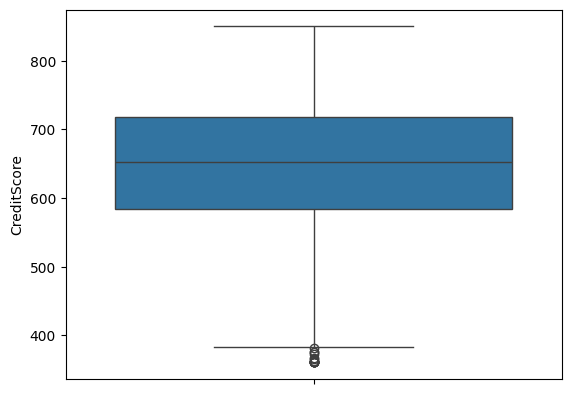

In [331]:
sb.boxplot(new_data['CreditScore'])

Now our data has been cleanned and is ready for use
but first we must convert it all into numerical data by dropping the categorical data or we use one-hot encoding(eg: the Surname, the Geography) i'll use one hot encoding 

In [332]:
new_data.drop(columns=['Surname'],inplace=True)

In [333]:

# Verify changes
print(new_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  float64
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB
None


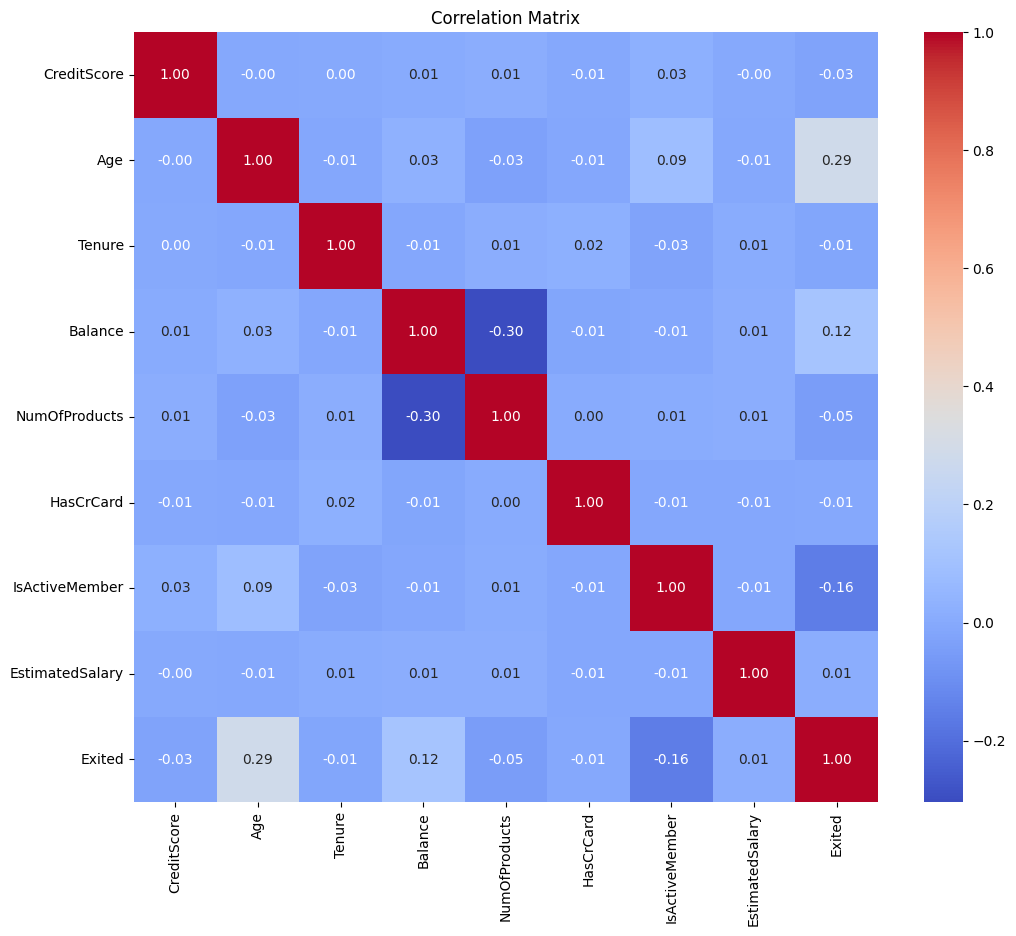

In [334]:
new_data.drop(columns=['Gender','Geography'],inplace=True)
plt.figure(figsize=(12, 10))
sb.heatmap(new_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

I used the correlation matrix to check and the compare the correlation between the attribute

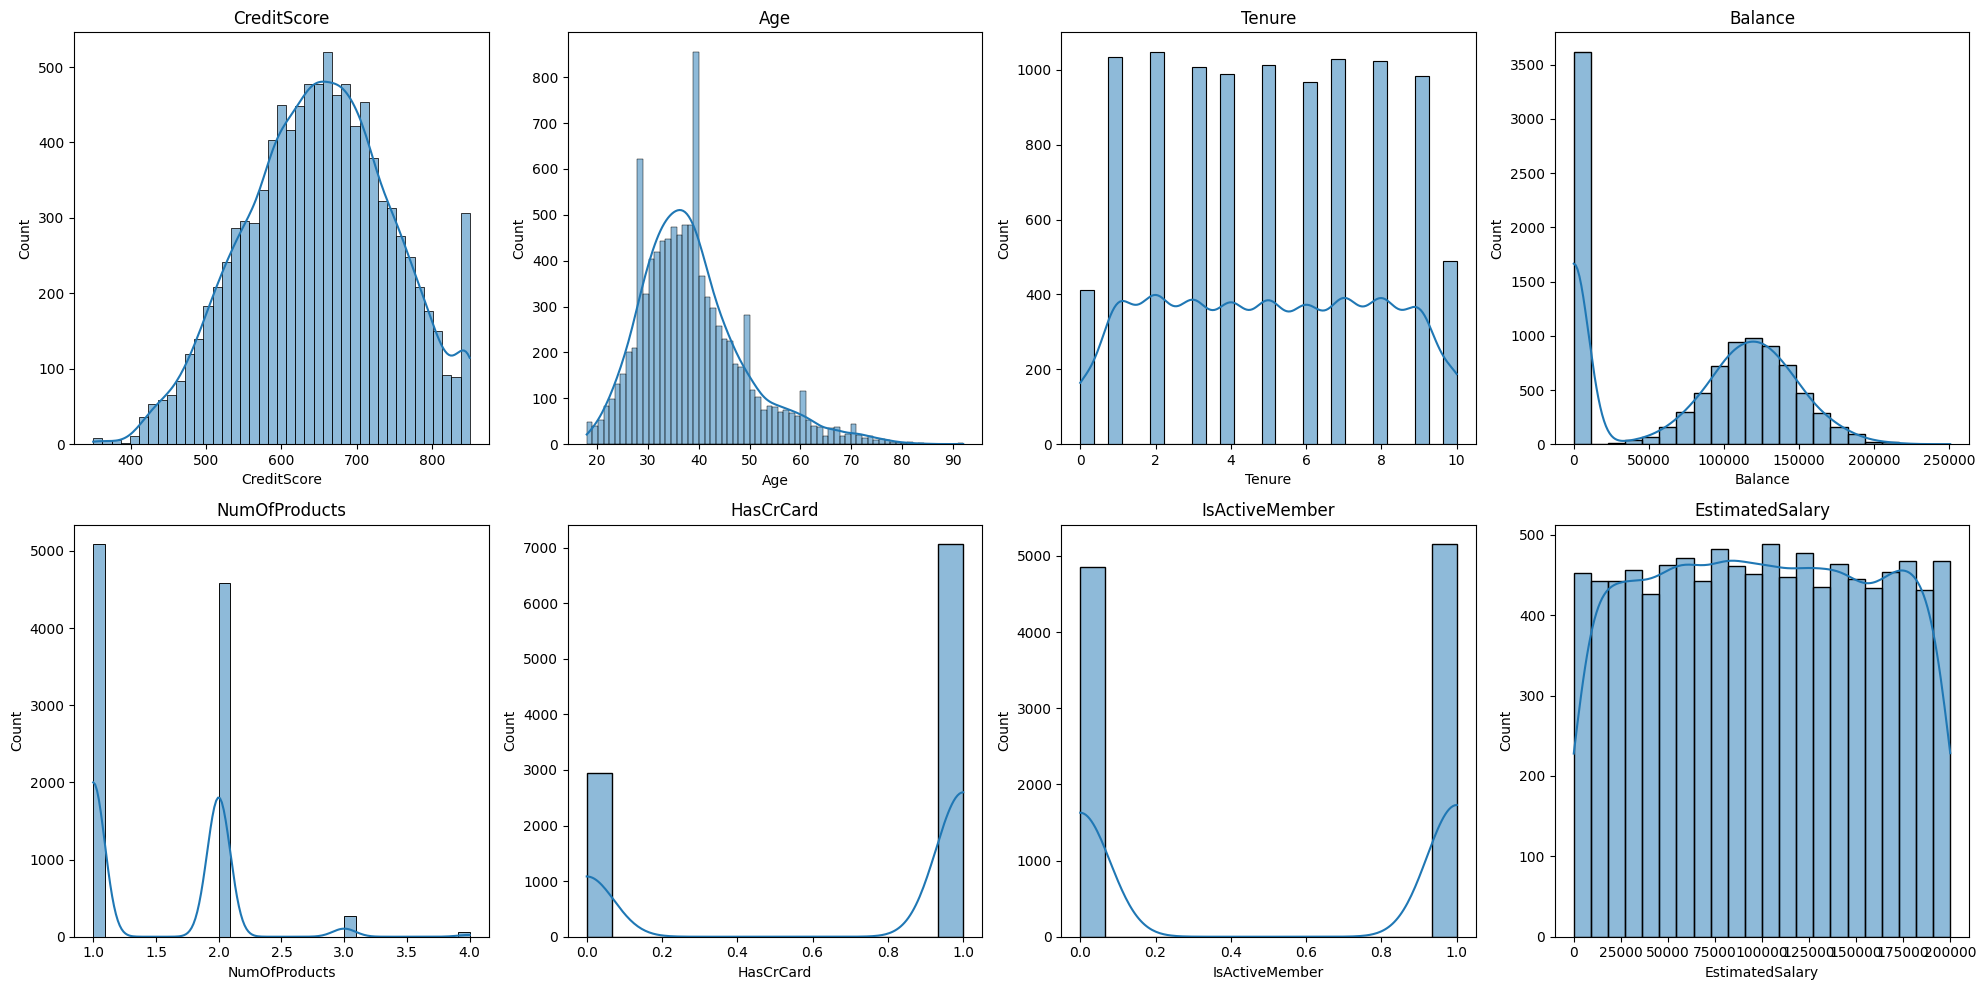

In [335]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# List of variables
variables = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

for ax, var in zip(axes.flatten(), variables):
    sb.histplot(df[var], ax=ax, kde=True)
    ax.set_title(var)

plt.tight_layout()
plt.show()

There was skewness in the data set particularly the Age Attribute to compute that we apply logarithmic transformation



In [339]:
new_data = df.copy()
new_data.loc[new_data['CreditScore']>upper_limit, 'CreditScore'] = upper_limit
new_data.loc[new_data['CreditScore']<lower_limit,'CreditScore'] = lower_limit

C:\Users\NEPC\AppData\Local\Temp\ipykernel_23200\3380057043.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '940.488696208391' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_data.loc[new_data['CreditScore']>upper_limit, 'CreditScore'] = upper_limit


In [340]:
new_data.drop(columns=['Surname'],inplace=True)

In [342]:
# One-hot encoding
new_data = pd.get_dummies(new_data, columns=['Gender', 'Geography'], drop_first=True)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  float64
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Gender_Male        10000 non-null  bool   
 10  Geography_Germany  10000 non-null  bool   
 11  Geography_Spain    10000 non-null  bool   
dtypes: bool(3), float64(3), int64(6)
memory usage: 732.6 KB


In [343]:
# print skewnss 
print(new_data.skew())
print("Skewness before transformation:")
print(new_data['Age'].skew())

# Apply logarithmic transformation (base 10) to the 'Age' variable
# Adding a small constant (1e-9) to avoid log(0) if there are any zero values
new_data['Age'] = np.log10(df['Age'] + 1e-9)

print("Skewness after transformation:")
print(new_data['Age'].skew())


CreditScore         -0.069933
Age                  1.011320
Tenure               0.010991
Balance             -0.141109
NumOfProducts        0.745568
HasCrCard           -0.901812
IsActiveMember      -0.060437
EstimatedSalary      0.002085
Exited               1.471611
Gender_Male         -0.183596
Geography_Germany    1.149340
Geography_Spain      1.169106
dtype: float64
Skewness before transformation:
1.0113202630234552
Skewness after transformation:
0.18202011258158898


now that we've done that lets get a pie chart to show us a clear visual of what we are working with

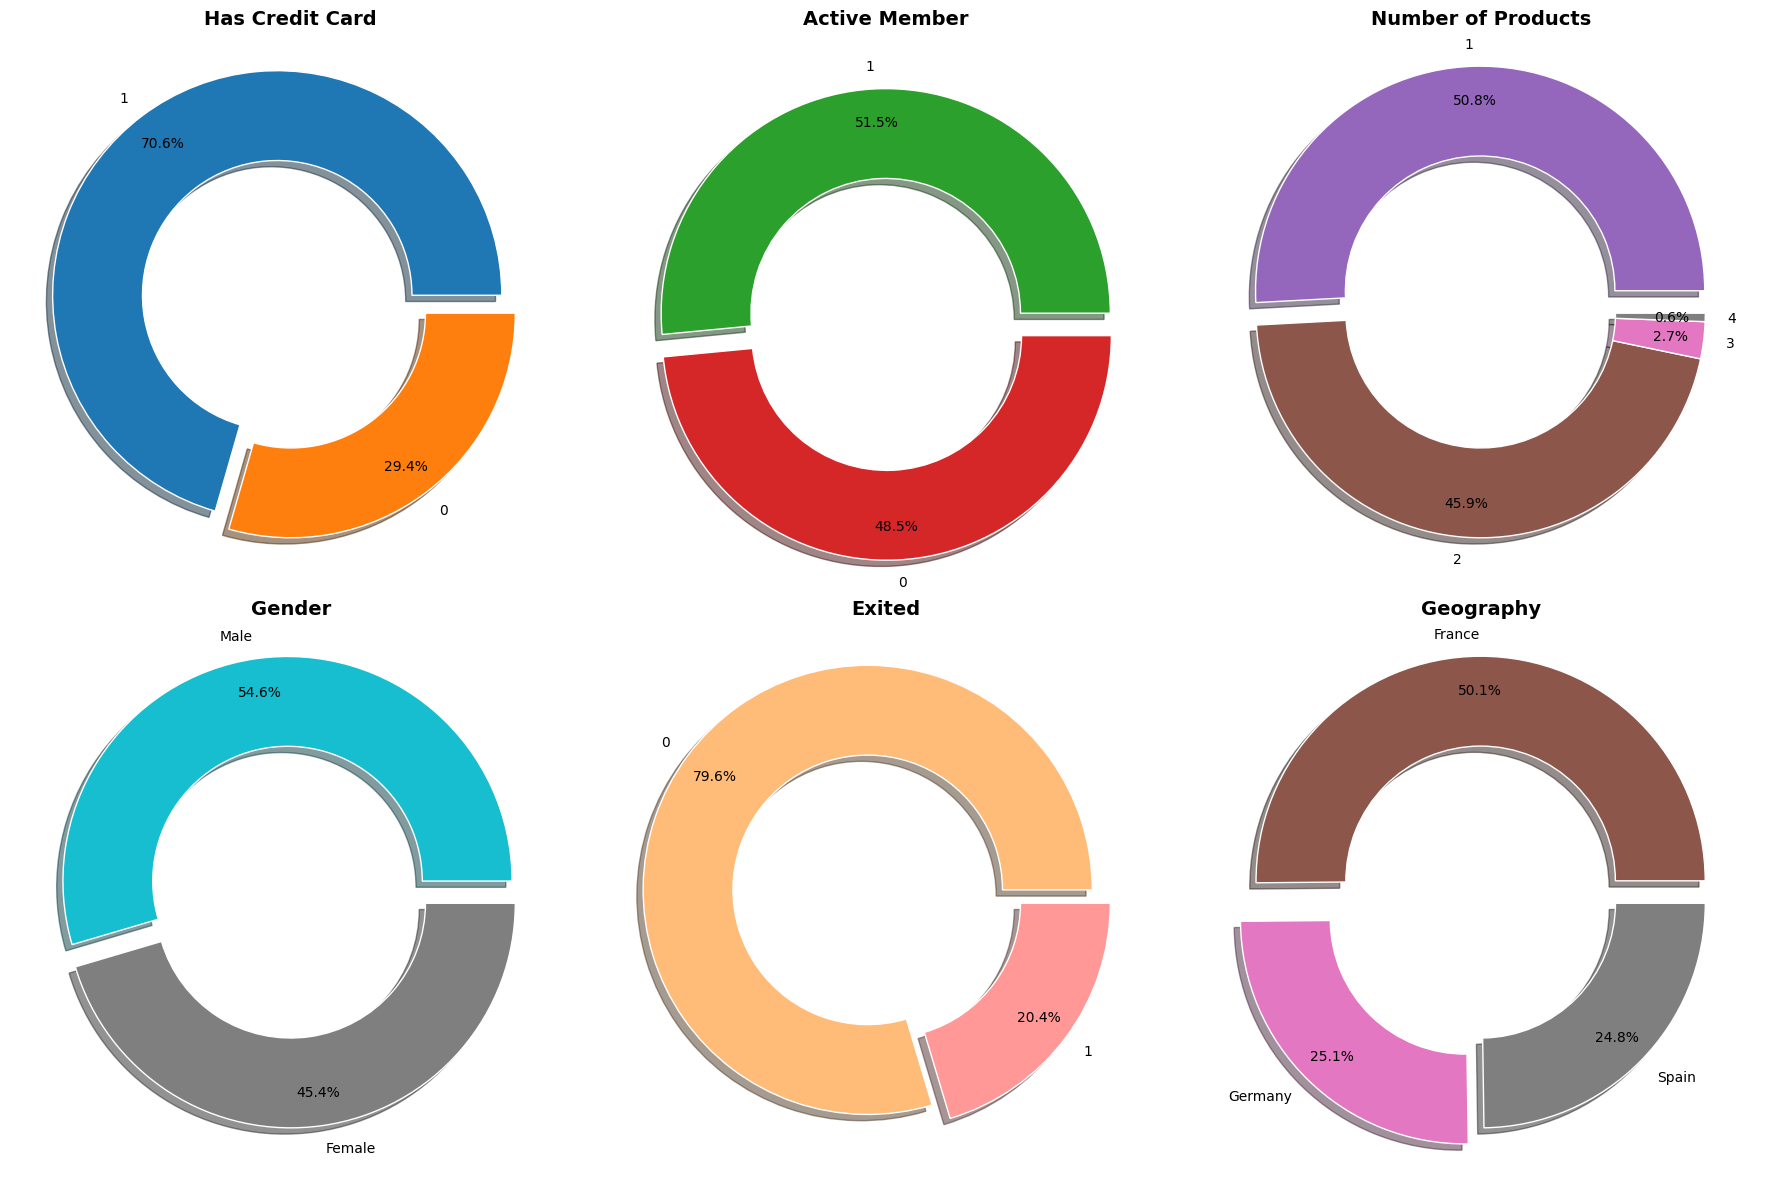

In [344]:
# Define colors and explode values for each pie chart
colors = {
    'HasCrCard': ['#1f77b4', '#ff7f0e'],
    'IsActiveMember': ['#2ca02c', '#d62728'],
    'NumOfProducts': ['#9467bd', '#8c564b', '#e377c2', '#7f7f7f'],
    'Gender': ['#17becf', '#7f7f7f'],
    'Exited': ['#ffbb78', '#ff9896'],
    'Geography': ['#8c564b', '#e377c2', '#7f7f7f']
}

explode_values = {
    'HasCrCard': (0.1, 0),
    'IsActiveMember': (0, 0.1),
    'NumOfProducts': (0.1, 0, 0, 0),
    'Gender': (0.1, 0),
    'Exited': (0.1, 0),
    'Geography': (0.1, 0.1, 0)
}

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# List of columns and titles
columns = ['HasCrCard', 'IsActiveMember', 'NumOfProducts', 'Gender', 'Exited', 'Geography']
titles = ['Has Credit Card', 'Active Member', 'Number of Products', 'Gender', 'Exited', 'Geography']

# Plot each pie chart
for ax, column, title in zip(axs.flatten(), columns, titles):
    counts = df[column].value_counts()
    ax.pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',
        colors=colors[column],
        explode=explode_values[column] + (0,) * (len(counts) - len(explode_values[column])),
        shadow=True,
        wedgeprops=dict(width=0.4, edgecolor='w'),
        pctdistance=0.85
    )
    ax.set_title(title, fontsize=14, fontweight='bold')

# Adjust layout
plt.tight_layout()
plt.show()


A count plot to show the distribution of Age and  balance  on the left, with age and credit score to the right this is to check the frequency of distribution beteen the two variables

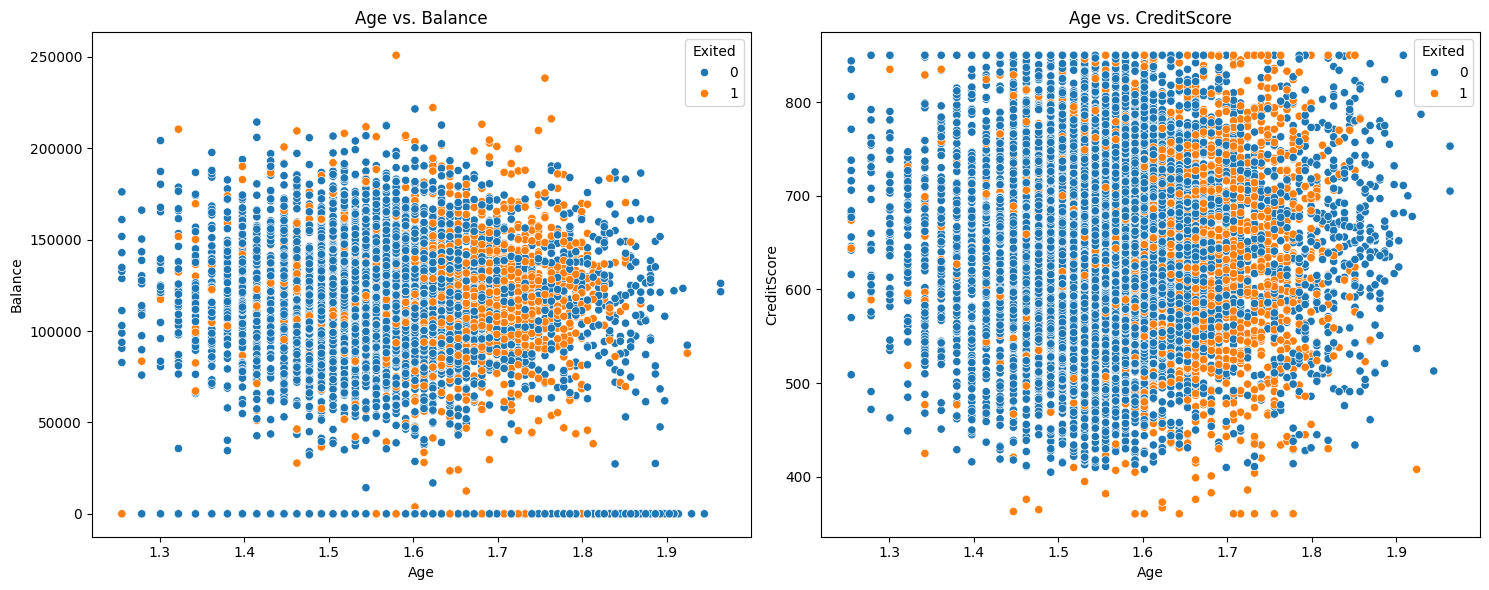

In [259]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

sb.scatterplot(x='Age', y='Balance', hue='Exited', data=new_data, ax=axs[0])
sb.scatterplot(x='Age', y='CreditScore', hue='Exited', data=new_data, ax=axs[1])

axs[0].set_title('Age vs. Balance')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Balance')
axs[1].set_title('Age vs. CreditScore')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('CreditScore')

plt.tight_layout()
plt.show()

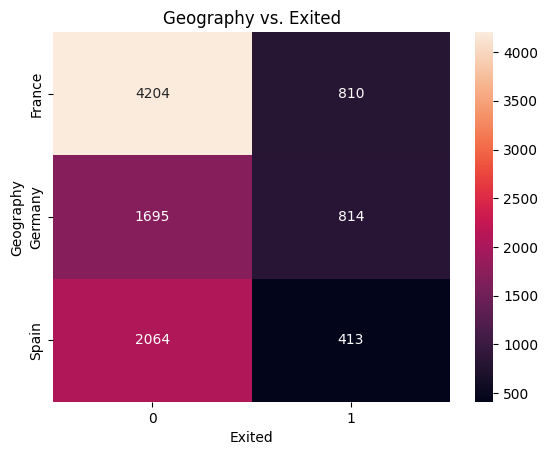

In [254]:
table = pd.crosstab(df['Geography'], df['Exited'])
sb.heatmap(table, annot=True,  fmt='g')
plt.title('Geography vs. Exited')
plt.show()

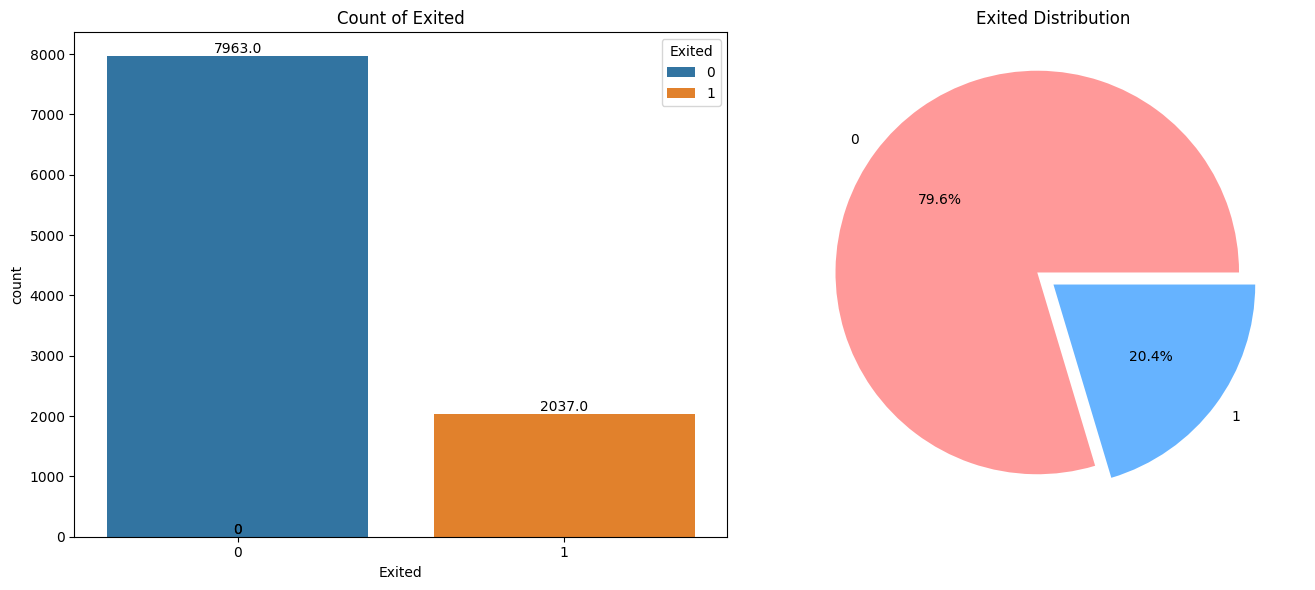

In [263]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Count plot with values on bars
sb.countplot(x='Exited', hue='Exited' , data=df, ax=axs[0])
axs[0].set_title('Count of Exited')
for p in axs[0].patches:
    height = p.get_height()
    axs[0].annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Pie chart
exit_counts = df['Exited'].value_counts()
axs[1].pie(exit_counts, labels=exit_counts.index, autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'], explode=(0.1, 0))
axs[1].set_title('Exited Distribution')
plt.tight_layout()
plt.show()

In [265]:



from sklearn.utils import resample


df_majority = new_data[new_data['Exited'] == 0]
df_minority = new_data[new_data['Exited'] == 1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,  # Sample with replacement
                                 n_samples=len(df_majority),  # Match the majority class
                                 random_state=42)  # For reproducibility

# Combine the majority class with the upsampled minority class
df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Shuffle the dataset
new_data= df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

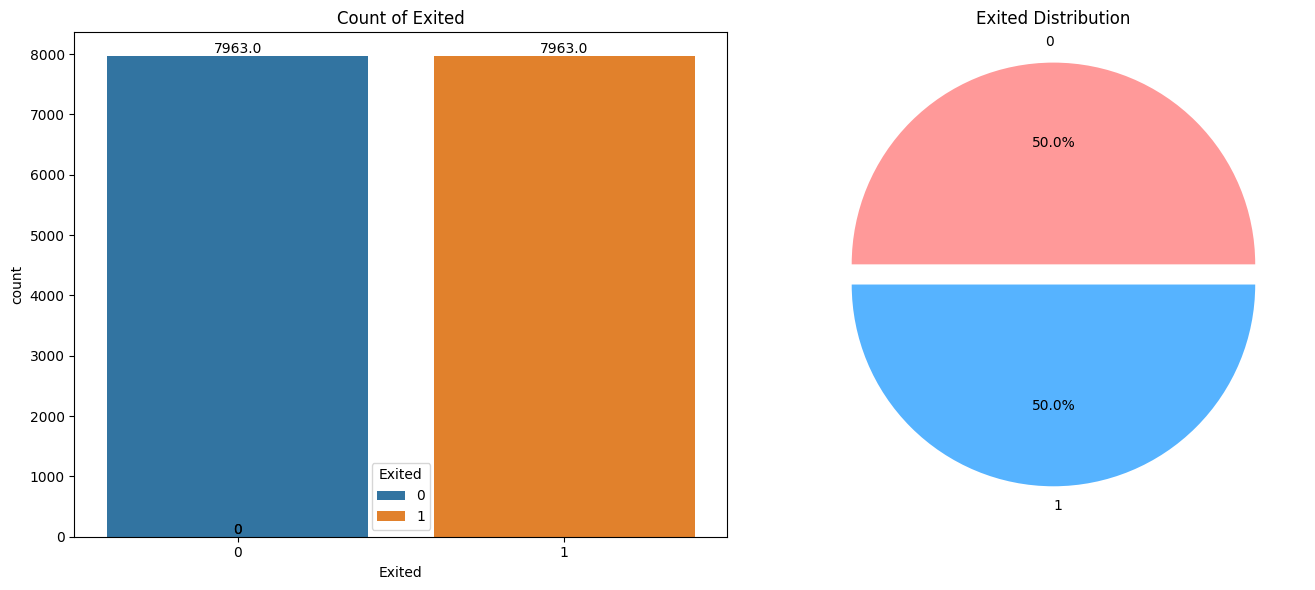

In [267]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Count plot with values on bars
sb.countplot(x='Exited',hue='Exited', data=new_data, ax=axs[0])
axs[0].set_title('Count of Exited')
for p in axs[0].patches:
    height = p.get_height()
    axs[0].annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Pie chart
exit_counts = new_data['Exited'].value_counts()
axs[1].pie(exit_counts, labels=exit_counts.index, autopct='%1.1f%%', colors=['#ff9999', '#56b3ff'], explode=(0.1, 0))
axs[1].set_title('Exited Distribution')

plt.tight_layout()
plt.show()

Now for the model building, but Firstly we perform one-hot encoding for the categorical data



In [ ]:
df = pd.get_dummies(df, columns=['Geography','Gender'], drop_first=True)

In [268]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Split the Data set

In [269]:
X = new_data.drop(columns=['Exited'])
y = new_data['Exited']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

Scale the Data


In [270]:
from sklearn.preprocessing import StandardScaler
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Build The Model

In [ ]:

# Build the model
model = Sequential()
    
    # Input layer + First hidden layer
model.add(Dense(units=352, activation='tanh', input_dim = 11))
model.add(Dropout(0.2))

# Additional hidden layers based on best hyperparameters
model.add(Dense(units=160, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(0.01)) 
model.add(Dense(units=384, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.01))
model.add(Dense(units=448, activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(units=352, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.34))
model.add(Dense(units=32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.0))
model.add(Dense(units=32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.0))
model.add(Dense(units=32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.0))

    # Output layer
model.add(Dense(units=1, activation='sigmoid'))  # Change to 'softmax' for multi-class classification

c:\Users\NEPC\Downloads\requests-main\requests-main\.conda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile the model

In [272]:
model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',  # Change to 'categorical_crossentropy' for multi-class
                  metrics=['accuracy'])

Train the model

In [273]:
# define early stopping
early_stopping = EarlyStopping( patience=5, restore_best_weights=True)
# Train model
history = model.fit(X_train, y_train,epochs=500,
 validation_data=(X_test, y_test),callbacks=[early_stopping])

Epoch 1/500
399/399 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.6667 - loss: 0.6262 - val_accuracy: 0.7467 - val_loss: 0.5082
Epoch 2/500
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7432 - loss: 0.5192 - val_accuracy: 0.7671 - val_loss: 0.4819
Epoch 3/500
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7546 - loss: 0.5013 - val_accuracy: 0.7690 - val_loss: 0.4707
Epoch 4/500
399/399 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7495 - loss: 0.4976 - val_accuracy: 0.7728 - val_loss: 0.4745
Epoch 5/500
399/399 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.7633 - loss: 0.4843 - val_accuracy: 0.7750 - val_loss: 0.4588
Epoch 6/500
399/399 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.7657 - loss: 0.4799 - val_accuracy: 0.7869 - val_loss: 0.4536
Epoch 7/500
399/399 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.7644 - loss: 0.4805 - val_accuracy: 0.7809 - val_loss: 0.4497
Epoch 8/500
399/399 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.7653 - loss: 0.4716 -

Evaluate the model

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
from sklearn.model_selection import cross_val_score

# Use cross-validation to evaluate the model
cv_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean CV score: {cv_scores.mean()}')

print(f'Test accuracy: {accuracy}')

100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9117 - loss: 0.2459
Test accuracy: 0.9121155142784119


Accuracy plot

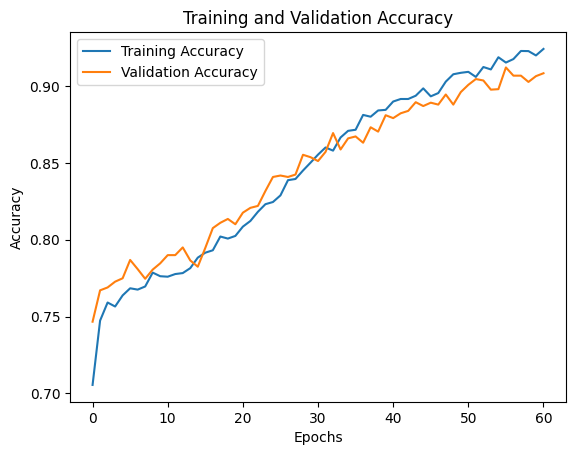

In [275]:
# Plot training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
# Plot validation accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
# Add legend to the plot
plt.legend()
# Show the plot
plt.show()

Loss Plot

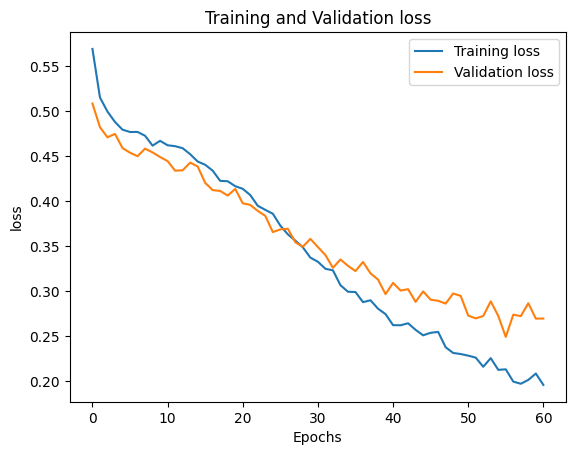

In [276]:
# Plot training accuracy
plt.plot(history.history['loss'], label='Training loss')
# Plot validation accuracy
plt.plot(history.history['val_loss'], label='Validation loss')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Training and Validation loss')
# Add legend to the plot
plt.legend()
# Show the plot
plt.show()

Confusion Matrix

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1582
           1       0.89      0.94      0.91      1604

    accuracy                           0.91      3186
   macro avg       0.91      0.91      0.91      3186
weighted avg       0.91      0.91      0.91      3186



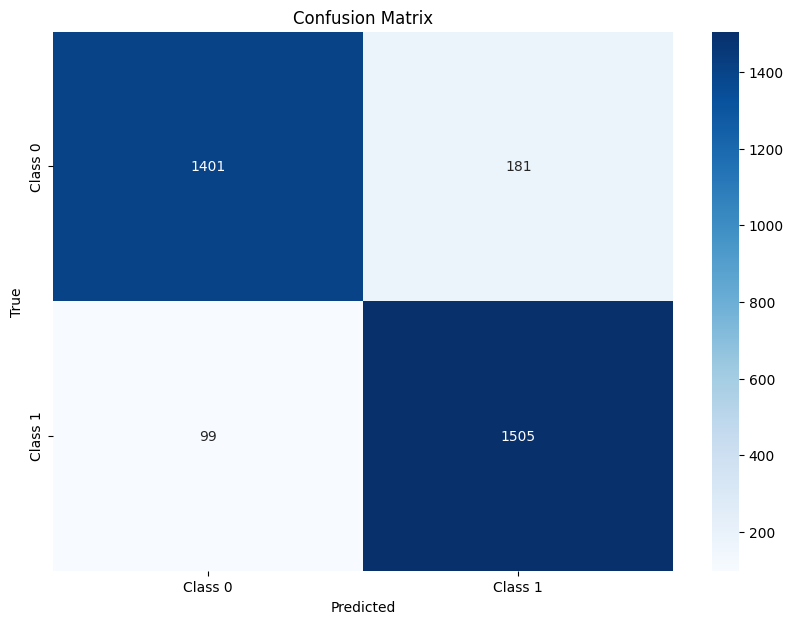

In [278]:
# Predict on test data
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Convert probabilities to binary class labels

# Print classification report
print(classification_report(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Save the model so it can be used again

In [347]:
model.save('Customer_churning.keras')


To load it Enter the following code


In [1]:
from tensorflow.keras.models import load_model
loaded_model = load_model('Customer_churning.keras')


c:\ProgramData\miniconda3\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 34 variables whereas the saved optimizer has 66 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [2]:
loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 352)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 352)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 160)            │        56,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 160)            │           640 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 384)            │        61,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 384)            │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 448)            │       172,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 448)            │         1,792 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 448)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 352)            │       158,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 352)            │         1,408 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 352)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │        11,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32)             │           12

 Total params: 941,636 (3.59 MB)

 Trainable params: 469,377 (1.79 MB)

 Non-trainable params: 2,880 (11.25 KB)

 Optimizer params: 469,379 (1.79 MB)